In [1]:
import os, sys
import glob
import numpy as np
import pandas as pd
import datasets
import json
import pickle
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = './datasets'

# Crema

In [3]:
# Crema
label_dict = {
    'SAD': 'sadness', 'FEA': 'fear', 'ANG': 'angry',
    'HAP': 'happiness', 'DIS': 'disgust', 'NEU': 'neutral'
}
data_dict = {'audio': [], 'age': [], 'gender': [], 'ethnic': [], 'lang': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

meta_df = pd.read_csv(f'{dataset_path}/Crema/VideoDemographics.csv')
for path in glob.glob(f'{dataset_path}/Crema/AudioWAV/*'):
    actor_id, uttr_id, label = path.split('/')[-1].split('_')[0:3]
    age = meta_df.loc[meta_df['ActorID'] == int(actor_id), 'Age'].values[0]
    gender = meta_df.loc[meta_df['ActorID'] == int(actor_id), 'Sex'].values[0]
    ethnic = meta_df.loc[meta_df['ActorID'] == int(actor_id), 'Race'].values[0]
    label = label_dict[label]
    
    data_dict['audio'].append(path)
    for emotion in label_dict.values():
        if label == emotion:
            data_dict[emotion].append(1)
        else:
            data_dict[emotion].append(0)
    data_dict['age'].append(age)
    data_dict['gender'].append(gender.lower())
    data_dict['ethnic'].append(ethnic.lower())
    data_dict['lang'].append('english')
    
crema_df = pd.DataFrame(data_dict)

<AxesSubplot: >

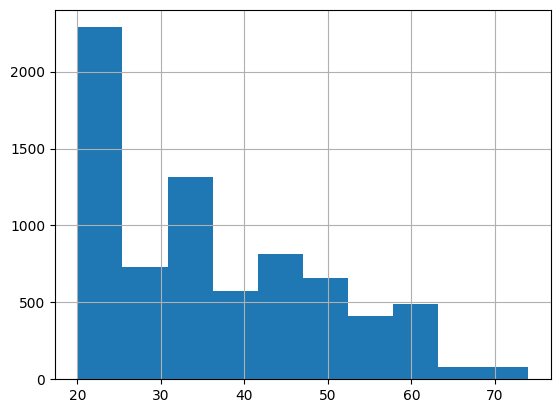

In [4]:
crema_df.age.hist()

In [5]:
print((crema_df.age >= 50).sum() / len(crema_df))
print((crema_df.age >= 55).sum() / len(crema_df))
print((crema_df.age >= 60).sum() / len(crema_df))
print((crema_df.age >= 65).sum() / len(crema_df))

0.19833378124160173
0.13222252082773447
0.06611126041386724
0.022037086804622415


In [6]:
crema_df

,audio,age,gender,ethnic,lang,sadness,fear,angry,happiness,disgust,neutral
0,./datasets/Crema/AudioWAV/1025_TSI_SAD_XX.wav,48,female,caucasian,english,1,0,0,0,0,0
1,./datasets/Crema/AudioWAV/1062_WSI_FEA_XX.wav,56,male,caucasian,english,0,1,0,0,0,0
2,./datasets/Crema/AudioWAV/1014_WSI_SAD_XX.wav,24,male,caucasian,english,1,0,0,0,0,0
3,./datasets/Crema/AudioWAV/1040_IEO_ANG_MD.wav,42,male,caucasian,english,0,0,1,0,0,0
4,./datasets/Crema/AudioWAV/1071_IEO_DIS_MD.wav,41,male,caucasian,english,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7437,./datasets/Crema/AudioWAV/1058_IWW_NEU_XX.wav,36,female,caucasian,english,0,0,0,0,0,1
7438,./datasets/Crema/AudioWAV/1056_DFA_HAP_XX.wav,52,female,african american,english,0,0,0,1,0,0
7439,./datasets/Crema/AudioWAV/1053_MTI_SAD_XX.wav,35,female,caucasian,english,1,0,0,0,0,0
7440,./datasets/Crema/AudioWAV/1024_MTI_NEU_XX.wav,59,female,caucasian,english,0,0,0,0,0,1


# EmoReact

In [7]:
# # EmoReact Convert to Wav
# import librosa
# import soundfile as sf

# paths = glob.glob('EmoReact/Data/Train/*.mp4') + \
#     glob.glob('EmoReact/Data/Validation/*.mp4') + \
#     glob.glob('EmoReact/Data/Test/*.mp4')

# for path in paths:
#     # Extract audio from mp4
#     audio, sr = librosa.load(path, sr=None)
#     sf.write(path.replace('.mp4', '.wav').replace('/Data/','/Audio/'), audio, sr)

In [8]:
label_dict = {
    0: 'curiosity', 1: 'uncertainty', 2: 'excitement', 3: 'happy', 
    4: 'surprise', 5: 'disgust', 6: 'fear', 7: 'frustration'
}

data_dict = {'audio': [], 'label': [], 'age_group': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

train_label_df = pd.read_csv(f'{dataset_path}/EmoReact/Labels/train_labels.text')
valid_label_df = pd.read_csv(f'{dataset_path}/EmoReact/Labels/val_labels.text')
test_label_df = pd.read_csv(f'{dataset_path}/EmoReact/Labels/test_labels.text')

In [9]:
len(train_label_df), len(valid_label_df), len(test_label_df)

(431, 302, 366)

In [10]:
len(glob.glob(f'{dataset_path}/EmoReact/Data/Train/*.mp4')), \
len(glob.glob(f'{dataset_path}/EmoReact/Data/Validation/*.mp4')), \
len(glob.glob(f'{dataset_path}/EmoReact/Data/Test/*.mp4'))

(432, 303, 367)

In [11]:
from collections import Counter
ctor = Counter()
for path in glob.glob(f'{dataset_path}/EmoReact/Data/Validation/*.mp4'):
    text = []
    for c in path.split('/')[-1].replace('_2.mp4','')[::-1]:
        if ord('0') <= ord(c) <= ord('9'):
            text += c
        else:
            break
    ctor[int(''.join(text[::-1]))] += 1
ctor.most_common(10) 

[(14, 6),
 (20, 6),
 (97, 6),
 (30, 6),
 (12, 6),
 (16, 5),
 (71, 5),
 (36, 5),
 (40, 5),
 (68, 5)]

In [12]:
# dfs = {}
# for label_df, folder_name in [(train_label_df, 'Train')], (valid_label_df, 'Validation'), (test_label_df, 'Test')
#     for path in sorted(glob.glob(f'{dataset_path}/EmoReact/Audio/{folder_name}/*.wav')):
#         pass

# ElderReact

In [13]:
# paths = glob.glob(f'{dataset_path}/ElderReact/ElderReact_train/*.mp4') + \
#         glob.glob(f'{dataset_path}/ElderReact/ElderReact_train/*.mp4') + \
#         glob.glob(f'{dataset_path}/ElderReact/ElderReact_train/*.mp4')

# for path in paths:
#     # Extract audio from mp4
#     audio, sr = librosa.load(path, sr=None)
#     sf.write(path.replace('.mp4', '.wav'), audio, sr)

In [14]:
data_columns = ['audio', 'angry', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'gender', 'valence']
elder_train_df = pd.read_csv(f'{dataset_path}/ElderReact/ElderReact-master/Annotations/train_labels.txt', sep=' ', header=None)
elder_valid_df = pd.read_csv(f'{dataset_path}/ElderReact/ElderReact-master/Annotations/dev_labels.txt', sep=' ', header=None)
elder_test_df = pd.read_csv(f'{dataset_path}/ElderReact/ElderReact-master/Annotations/test_labels.txt', sep=' ', header=None)

elder_train_df.columns = data_columns
elder_valid_df.columns = data_columns
elder_test_df.columns = data_columns

elder_train_df['lang'] = 'english'
elder_valid_df['lang'] = 'english'
elder_test_df['lang'] = 'english'

elder_train_df['audio'] = elder_train_df['audio'].apply(lambda x: f'{dataset_path}/ElderReact/ElderReact_train/{x}'.replace('.mp4','.wav'))
elder_valid_df['audio'] = elder_valid_df['audio'].apply(lambda x: f'{dataset_path}/ElderReact/ElderReact_train/{x}'.replace('.mp4','.wav'))
elder_test_df['audio'] = elder_test_df['audio'].apply(lambda x: f'{dataset_path}/ElderReact/ElderReact_train/{x}'.replace('.mp4','.wav'))

elder_train_df['gender'] = elder_train_df['gender'].apply(lambda x: 'male' if x == 'm' else 'female')
elder_valid_df['gender'] = elder_valid_df['gender'].apply(lambda x: 'male' if x == 'm' else 'female')
elder_test_df['gender'] = elder_test_df['gender'].apply(lambda x: 'male' if x == 'm' else 'female')

elder_train_df['split'] = 'train'
elder_valid_df['split'] = 'valid'
elder_test_df['split'] = 'test'

elder_train_df['age'] = 65
elder_valid_df['age'] = 65
elder_test_df['age'] = 65

elder_df = pd.concat([elder_train_df, elder_valid_df, elder_test_df])

In [15]:
elder_df

,audio,angry,disgust,fear,happiness,sadness,surprise,gender,valence,lang,split,age
0,./datasets/ElderReact/ElderReact_train/50_50_1...,0,1,1,0,0,1,female,1.666667,english,train,65
1,./datasets/ElderReact/ElderReact_train/50_50_1...,1,0,0,0,0,0,male,2.333333,english,train,65
2,./datasets/ElderReact/ElderReact_train/50_50_1...,1,1,0,0,0,1,female,1.666667,english,train,65
3,./datasets/ElderReact/ElderReact_train/50_50_1...,1,1,0,0,0,1,female,2.000000,english,train,65
4,./datasets/ElderReact/ElderReact_train/50_50_2...,0,1,1,0,1,1,female,2.666667,english,train,65
...,...,...,...,...,...,...,...,...,...,...,...,...
348,./datasets/ElderReact/ElderReact_train/would_y...,0,0,0,1,0,0,male,5.333333,english,test,65
349,./datasets/ElderReact/ElderReact_train/would_y...,0,0,0,1,0,0,female,5.666667,english,test,65
350,./datasets/ElderReact/ElderReact_train/would_y...,1,0,0,0,0,0,male,4.333333,english,test,65
351,./datasets/ElderReact/ElderReact_train/would_y...,0,0,0,1,0,0,male,5.000000,english,test,65


# EmotionLines 
*notes*: The data is text-only

In [16]:
train_dfs = []
for data in json.load(open(f'{dataset_path}/EmotionLines/Friends/friends_train.json', 'r')):
    train_dfs.append(pd.DataFrame(data))
friends_train_df = pd.concat(train_dfs)

valid_dfs = []
for data in json.load(open(f'{dataset_path}/EmotionLines/Friends/friends_dev.json', 'r')):
    valid_dfs.append(pd.DataFrame(data))
friends_valid_df = pd.concat(valid_dfs)

test_dfs = []
for data in json.load(open(f'{dataset_path}/EmotionLines/Friends/friends_test.json', 'r')):
    test_dfs.append(pd.DataFrame(data))
friends_test_df = pd.concat(test_dfs)

In [17]:
pd.concat([friends_train_df, friends_valid_df, friends_test_df])

,speaker,utterance,emotion,annotation
0,Chandler,also I was the point person on my companys tr...,neutral,4100000
1,The Interviewer,You mustve had your hands full.,neutral,5000000
2,Chandler,That I did. That I did.,neutral,5000000
3,The Interviewer,So lets talk a little bit about your duties.,neutral,5000000
4,Chandler,My duties? All right.,surprise,2000030
...,...,...,...,...
14,Phoebe,"Hey, why dont you guys go get portraits done ...",neutral,5000000
15,Monica,Thats a good idea! I bet they have one of tho...,joy,1400000
16,Phoebe,"Yeah thats great! Next to that, Chandler won...",neutral,3100100
17,Monica,Chandler what do you say?,neutral,5000000


# ESD

In [18]:
speaker_id_map = {
    '0001': ('Chinese', 'Female'),
    '0002': ('Chinese', 'Female'),
    '0003': ('Chinese', 'Female'),
    '0004': ('Chinese', 'Male'),
    '0005': ('Chinese', 'Male'),
    '0006': ('Chinese', 'Male'),
    '0007': ('Chinese', 'Female'),
    '0008': ('Chinese', 'Male'),
    '0009': ('Chinese', 'Female'),
    '0010': ('Chinese', 'Male'),
    '0011': ('English', 'Male'),
    '0012': ('English', 'Male'),
    '0013': ('English', 'Male'),
    '0014': ('English', 'Male'),
    '0015': ('English', 'Female'),
    '0016': ('English', 'Female'),
    '0017': ('English', 'Female'),
    '0018': ('English', 'Female'),
    '0019': ('English', 'Female'),
    '0020': ('English', 'Male')
}

In [19]:
label_dict = {'Angry': 'angry', 'Happy': 'happiness', 'Neutral': 'neutral', 'Sad': 'sadness', 'Surprise': 'surprise'}
data_dict = {'audio': [], 'gender': [], 'lang': [], 'split': [], 'age': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

for folder_path in glob.glob(f'{dataset_path}/ESD/*[!.txt]'):
    lang, gender = speaker_id_map[folder_path.split('/')[-1]]
    for emot_k, emot_v in label_dict.items():
        for split_path in glob.glob(f'{folder_path}/{emot_k}/*'):
            split = split_path.split('/')[-1]
            for path in glob.glob(f'{split_path}/*.wav'):
                data_dict['audio'].append(path)
                for emotion in label_dict.values():
                    if emot_v == emotion:
                        data_dict[emotion].append(1)
                    else:
                        data_dict[emotion].append(0)
                data_dict['lang'].append(lang.lower())
                data_dict['gender'].append(gender.lower())
                data_dict['split'].append('valid' if split.lower() == 'evaluation' else split.lower())
                data_dict['age'].append(30)

esd_df = pd.DataFrame(data_dict)

In [20]:
esd_df

,audio,gender,lang,split,age,angry,happiness,neutral,sadness,surprise
0,./datasets/ESD/0004/Angry/train/0004_000417.wav,male,chinese,train,30,1,0,0,0,0
1,./datasets/ESD/0004/Angry/train/0004_000671.wav,male,chinese,train,30,1,0,0,0,0
2,./datasets/ESD/0004/Angry/train/0004_000426.wav,male,chinese,train,30,1,0,0,0,0
3,./datasets/ESD/0004/Angry/train/0004_000438.wav,male,chinese,train,30,1,0,0,0,0
4,./datasets/ESD/0004/Angry/train/0004_000523.wav,male,chinese,train,30,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
34995,./datasets/ESD/0005/Surprise/test/0005_001431.wav,male,chinese,test,30,0,0,0,0,1
34996,./datasets/ESD/0005/Surprise/test/0005_001448.wav,male,chinese,test,30,0,0,0,0,1
34997,./datasets/ESD/0005/Surprise/test/0005_001423.wav,male,chinese,test,30,0,0,0,0,1
34998,./datasets/ESD/0005/Surprise/test/0005_001443.wav,male,chinese,test,30,0,0,0,0,1


# Chinese-Speech-Emotion-Datasets

In [21]:
label_dict = {'pos': 'positive', 'nat': 'neutral', 'neg': 'negative'}
data_dict = {'audio': [], 'gender': [], 'lang': [], 'age': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

for path in glob.glob(f'{dataset_path}/Chinese-Speech-Emotion-Datasets/Training Data (wav)/*/*.wav'):
    meta = path.split('/')[-1].lower().replace('_','-')
    emot_meta, gender = meta.split('-')[:2]
    label = label_dict[emot_meta]
    
    data_dict['audio'].append(path)
    for emotion in label_dict.values():
        if label == emotion:
            data_dict[emotion].append(1)
        else:
            data_dict[emotion].append(0)
    data_dict['gender'].append(gender)
    data_dict['lang'].append('chinese')
    data_dict['age'].append(65)
csed_df = pd.DataFrame(data_dict)

In [22]:
csed_df

,audio,gender,lang,age,positive,neutral,negative
0,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,male,chinese,65,1,0,0
1,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,male,chinese,65,1,0,0
2,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,male,chinese,65,1,0,0
3,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,male,chinese,65,1,0,0
4,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,female,chinese,65,1,0,0
...,...,...,...,...,...,...,...
647,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,male,chinese,65,0,0,1
648,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,female,chinese,65,0,0,1
649,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,female,chinese,65,0,0,1
650,./datasets/Chinese-Speech-Emotion-Datasets/Tra...,female,chinese,65,0,0,1


# TESS

In [23]:
label_dict = {
    'angry': 'angry', 'disgust': 'disgust', 'fear': 'fear', 'ps': 'surprise',
    'happy': 'happiness', 'neutral': 'neutral', 'sad': 'sadness'
}
data_dict = {'audio': [], 'gender': [], 'age': [], 'lang': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

for path in glob.glob(f'{dataset_path}/TESS/TESS Toronto emotional speech set data/*/*.wav'):
    meta = path.split('/')[-1].split('.')[0].lower()
    age_meta, sent_meta, label_meta = meta.split('_')
    age = 64 if age_meta == 'oaf' else 26
    label = label_dict[label_meta]
    
    data_dict['audio'].append(path)
    for emotion in label_dict.values():
        if label == emotion:
            data_dict[emotion].append(1)
        else:
            data_dict[emotion].append(0)
    data_dict['age'].append(age)
    data_dict['gender'].append('female')
    data_dict['lang'].append('english')
tess_df = pd.DataFrame(data_dict)

In [24]:
tess_df

,audio,gender,age,lang,angry,disgust,fear,surprise,happiness,neutral,sadness
0,./datasets/TESS/TESS Toronto emotional speech ...,female,64,english,0,0,1,0,0,0,0
1,./datasets/TESS/TESS Toronto emotional speech ...,female,64,english,0,0,1,0,0,0,0
2,./datasets/TESS/TESS Toronto emotional speech ...,female,64,english,0,0,1,0,0,0,0
3,./datasets/TESS/TESS Toronto emotional speech ...,female,64,english,0,0,1,0,0,0,0
4,./datasets/TESS/TESS Toronto emotional speech ...,female,64,english,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2795,./datasets/TESS/TESS Toronto emotional speech ...,female,26,english,0,0,0,0,0,1,0
2796,./datasets/TESS/TESS Toronto emotional speech ...,female,26,english,0,0,0,0,0,1,0
2797,./datasets/TESS/TESS Toronto emotional speech ...,female,26,english,0,0,0,0,0,1,0
2798,./datasets/TESS/TESS Toronto emotional speech ...,female,26,english,0,0,0,0,0,1,0


# IEMOCAP

In [25]:
metadata = pickle.load(open(f'{dataset_path}/IEMOCAP/meta.pkl', 'rb'))

label_dict = {
    'ang': 'angry', 'dis': 'disgust', 'exc': 'excitement', 'fea': 'fear', 
    'fru': 'frustrated', 'hap': 'happiness', 'neu': 'neutral', 'oth': 'other',
    'sad': 'sadness', 'sur': 'surprise', 'xxx': 'unknown'
}
data_dict = data_dict = {'audio': [], 'gender': [], 'age': [], 'lang': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

for path in glob.glob(f'{dataset_path}/IEMOCAP/Ses*/*/audio.wav'):
    session_id = path.split('/')[-2]
    gender = 'male' if session_id.split('_')[0][-1] == 'M' else 'female'
    label = label_dict[metadata[session_id]['label']]
    
    data_dict['audio'].append(path)
    for emotion in label_dict.values():
        if label == emotion:
            data_dict[emotion].append(1)
        else:
            data_dict[emotion].append(0)
    data_dict['gender'].append(gender)
    data_dict['age'].append(30)
    data_dict['lang'].append('english')
iemocap_df = pd.DataFrame(data_dict)

In [26]:
iemocap_df

,audio,gender,age,lang,angry,disgust,excitement,fear,frustrated,happiness,neutral,other,sadness,surprise,unknown
0,./datasets/IEMOCAP/Ses03F_impro08/Ses03F_impro...,female,30,english,0,0,0,0,1,0,0,0,0,0,0
1,./datasets/IEMOCAP/Ses03F_impro08/Ses03F_impro...,female,30,english,0,0,0,0,1,0,0,0,0,0,0
2,./datasets/IEMOCAP/Ses03F_impro08/Ses03F_impro...,female,30,english,0,0,0,0,0,0,1,0,0,0,0
3,./datasets/IEMOCAP/Ses03F_impro08/Ses03F_impro...,female,30,english,0,0,0,0,0,0,1,0,0,0,0
4,./datasets/IEMOCAP/Ses03F_impro08/Ses03F_impro...,female,30,english,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,./datasets/IEMOCAP/Ses05F_impro04/Ses05F_impro...,female,30,english,0,0,0,0,0,0,1,0,0,0,0
10035,./datasets/IEMOCAP/Ses05F_impro04/Ses05F_impro...,female,30,english,0,0,0,0,1,0,0,0,0,0,0
10036,./datasets/IEMOCAP/Ses05F_impro04/Ses05F_impro...,female,30,english,0,0,0,0,1,0,0,0,0,0,0
10037,./datasets/IEMOCAP/Ses05F_impro04/Ses05F_impro...,female,30,english,0,0,0,0,1,0,0,0,0,0,0


# CMU-MOSEI

In [27]:
label_dict = {
    0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happiness',  4: 'sadness', 5: 'surprise'
}
data_dict = data_dict = {'audio': [], 'lang': []}
data_dict.update({ emotion: [] for emotion in label_dict.values()})

metadata = pickle.load(open(f'{dataset_path}/CMU_MOSEI/meta.pkl', 'rb'))
for path in glob.glob(f'{dataset_path}/CMU_MOSEI/*/audio.wav'):
    session_id = path.split('/')[-2]
    labels = metadata[session_id]['label']
    
    data_dict['audio'].append(path)
    data_dict['lang'].append('english')
    for i, label in enumerate(labels):
        data_dict[label_dict[i]].append(label)
cmu_mosei_df = pd.DataFrame(data_dict)
cmu_mosei_df['age'] = -100

In [28]:
cmu_mosei_df

,audio,lang,angry,disgust,fear,happiness,sadness,surprise,age
0,./datasets/CMU_MOSEI/vU0a4F36Ksw_8/audio.wav,english,0,0,0,1,0,0,-100
1,./datasets/CMU_MOSEI/xaSf1d13WoY_4/audio.wav,english,0,0,0,0,0,0,-100
2,./datasets/CMU_MOSEI/sw-smuVRByI_3/audio.wav,english,0,1,0,0,0,0,-100
3,./datasets/CMU_MOSEI/lawHYX5eB20_2/audio.wav,english,0,0,0,1,0,0,-100
4,./datasets/CMU_MOSEI/MZoLQD83R-4_8/audio.wav,english,0,0,1,1,1,0,-100
...,...,...,...,...,...,...,...,...,...
23254,./datasets/CMU_MOSEI/vU0a4F36Ksw_4/audio.wav,english,0,0,0,1,0,0,-100
23255,./datasets/CMU_MOSEI/298774_9/audio.wav,english,0,0,0,1,1,0,-100
23256,./datasets/CMU_MOSEI/39lcRCFvV-s_30/audio.wav,english,0,1,0,1,0,0,-100
23257,./datasets/CMU_MOSEI/d0QNH2vcDgU_7/audio.wav,english,0,0,0,1,0,0,-100


# Aggregate

In [29]:
# Add dataset name
crema_df['dataset'] = 'crema'
elder_df['dataset'] = 'elder_react'
esd_df['dataset'] = 'esd'
csed_df['dataset'] = 'csed'
tess_df['dataset'] = 'tess'
iemocap_df['dataset'] = 'iemocap'
cmu_mosei_df['dataset'] = 'cmu_mosei'

In [30]:
# Add age group
elderly_threshold = 60
def get_age_group(age):
    if age == -100:
        return 'unknown'
    elif age >= elderly_threshold:
        return 'elderly'  
    else: 
        return 'others'

crema_df['age_group'] = crema_df['age'].apply(get_age_group)
elder_df['age_group'] = elder_df['age'].apply(get_age_group)
esd_df['age_group'] = esd_df['age'].apply(get_age_group)
csed_df['age_group'] = csed_df['age'].apply(get_age_group)
tess_df['age_group'] = tess_df['age'].apply(get_age_group)
iemocap_df['age_group'] = iemocap_df['age'].apply(get_age_group)
cmu_mosei_df['age_group'] = cmu_mosei_df['age'].apply(get_age_group)

In [31]:
crema_elderly_df = crema_df[crema_df['age_group'] == 'elderly']
crema_others_df = crema_df[crema_df['age_group'] == 'others']

In [32]:
tess_elderly_df = tess_df[tess_df['age_group'] == 'elderly']
tess_others_df = tess_df[tess_df['age_group'] == 'others']

In [33]:
def assign_dataset_split(df, val_size, test_size, stratify_col='gender', seed=0):
    tr_val_df, test_df = train_test_split(df, stratify=df[stratify_col], test_size=test_size, random_state=seed)
    train_df, valid_df = train_test_split(tr_val_df, stratify=tr_val_df[stratify_col], test_size=val_size, random_state=seed)
    train_df.loc[:,'split'] = 'train'
    valid_df.loc[:,'split'] = 'valid'
    test_df.loc[:,'split'] = 'test'
    
    return pd.concat([train_df, valid_df, test_df])

In [34]:
csed_df = assign_dataset_split(csed_df, val_size=52, test_size=400)
crema_elderly_df = assign_dataset_split(crema_elderly_df, val_size=42, test_size=300)
crema_others_df = assign_dataset_split(crema_others_df, val_size=750, test_size=1200)
tess_elderly_df = assign_dataset_split(tess_elderly_df, val_size=200, test_size=500)
tess_others_df = assign_dataset_split(tess_others_df, val_size=201, test_size=500)
iemocap_df = assign_dataset_split(iemocap_df, val_size=1039, test_size=1500)
cmu_mosei_df = assign_dataset_split(cmu_mosei_df, val_size=1259, test_size=2000, stratify_col='age_group')

In [35]:
combined_df = pd.concat([
    crema_others_df, crema_elderly_df, elder_df, esd_df, csed_df, 
    tess_others_df, tess_elderly_df, iemocap_df, cmu_mosei_df
])

In [36]:
numeric_columns = [
    'sadness', 'fear', 'angry', 'happiness', 'disgust', 'neutral',  
    'happiness', 'surprise', 'valence', 'positive', 'negative',
    'excitement', 'frustrated', 'other', 'unknown'
]

for column in combined_df.columns:
    if column in numeric_columns:
        combined_df[[column]] = combined_df[[column]].fillna(0) # This should be something indicative during training, e.g., -100
    else:
        combined_df[[column]] = combined_df[[column]].fillna('unknown')

In [37]:
combined_df.groupby(['lang', 'age_group', 'split', 'dataset']).size().to_csv('dataset_statistics.csv')
combined_df.groupby(['lang', 'age_group', 'split', 'dataset']).size()

lang     age_group  split  dataset    
chinese  elderly    test   csed             400
                    train  csed             200
                    valid  csed              52
         others     test   esd             1500
                    train  esd            15000
                    valid  esd             1000
english  elderly    test   crema            300
                           elder_react      353
                           tess             500
                    train  crema            150
                           elder_react      615
                           tess             699
                    valid  crema             42
                           elder_react      355
                           tess             200
         others     test   crema           1200
                           esd             1500
                           iemocap         1500
                           tess             500
                    train  crema           5000
 

In [38]:
# Check Multilabel
combined_df.loc[combined_df[[
    'sadness', 'fear', 'angry', 'happiness', 'disgust', 'neutral', 'surprise', 
    'positive', 'negative', 'excitement', 'frustrated', 'other', 'unknown'
]].sum(axis='columns') > 1, 'dataset'].unique()

array(['elder_react', 'cmu_mosei'], dtype=object)

In [39]:
combined_df.groupby(['lang', 'age_group', 'split', 'dataset']).size().to_frame('count')\
    .reset_index().pivot(['lang', 'age_group', 'dataset'], ['split'], 'count').to_csv('splitted_dataset_statistics.csv')

In [40]:
dset = datasets.Dataset.from_pandas(combined_df)
dset = dset.cast_column("audio", datasets.features.Audio(sampling_rate=16000))

In [41]:
en_others_df = combined_df.loc[(combined_df['lang'] == 'english') & (combined_df['age_group'] == 'others')]
en_elderly_df = combined_df.loc[(combined_df['lang'] == 'english') & (combined_df['age_group'] == 'elderly')]
zh_others_df = combined_df.loc[(combined_df['lang'] == 'chinese') & (combined_df['age_group'] == 'others')]
zh_elderly_df = combined_df.loc[(combined_df['lang'] == 'chinese') & (combined_df['age_group'] == 'elderly')]

trn_en_others_df = en_others_df.loc[en_others_df['split'] == 'train']
val_en_others_df = en_others_df.loc[en_others_df['split'] == 'valid']
tst_en_others_df = en_others_df.loc[en_others_df['split'] == 'test']

trn_en_elderly_df = en_elderly_df.loc[en_elderly_df['split'] == 'train']
val_en_elderly_df = en_elderly_df.loc[en_elderly_df['split'] == 'valid']
tst_en_elderly_df = en_elderly_df.loc[en_elderly_df['split'] == 'test']

trn_zh_others_df = zh_others_df.loc[zh_others_df['split'] == 'train']
val_zh_others_df = zh_others_df.loc[zh_others_df['split'] == 'valid']
tst_zh_others_df = zh_others_df.loc[zh_others_df['split'] == 'test']

trn_zh_elderly_df = zh_elderly_df.loc[zh_elderly_df['split'] == 'train']
val_zh_elderly_df = zh_elderly_df.loc[zh_elderly_df['split'] == 'valid']
tst_zh_elderly_df = zh_elderly_df.loc[zh_elderly_df['split'] == 'test']

In [42]:
(trn_en_elderly_df, val_en_elderly_df, {dset: df for dset, df in tst_en_elderly_df.groupby('dataset')}),
(trn_zh_others_df, val_zh_others_df, {dset: df for dset, df in tst_zh_others_df.groupby('dataset')}),
(trn_zh_elderly_df, val_zh_elderly_df, {dset: df for dset, df in tst_zh_elderly_df.groupby('dataset')})

(                                                 audio  age  gender   ethnic  \
 146  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 631  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65    male  unknown   
 70   ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65    male  unknown   
 372  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65    male  unknown   
 134  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 ..                                                 ...  ...     ...      ...   
 125  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 2    ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65    male  unknown   
 619  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 318  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 571  ./datasets/Chinese-Speech-Emotion-Datasets/Tra...   65  female  unknown   
 
         lang  sadness  fe

### Label Formatting

In [72]:
from transformers.modeling_outputs import (
    SequenceClassifierOutput
)

In [70]:
label_list = [
    'sadness', 'fear', 'angry', 'happiness', 'disgust', 'neutral', 'surprise', 
    'positive', 'negative', 'excitement', 'frustrated', 'other', 'unknown'
]
combined_df['labels'] = combined_df.apply(lambda x: [int(x[label]) for label in label_list], axis=1)

In [71]:
combined_df[list(set(list(combined_df.columns)) - set(label_list + ['valence']))]

,age_group,age,dataset,split,lang,labels,ethnic,audio,gender
6870,others,21,crema,train,english,"[0, 0, 0, 0, 0, 1, -100, -100, -100, -100, -10...",african american,./datasets/Crema/AudioWAV/1038_TAI_NEU_XX.wav,male
6327,others,46,crema,train,english,"[0, 0, 0, 1, 0, 0, -100, -100, -100, -100, -10...",caucasian,./datasets/Crema/AudioWAV/1008_IWW_HAP_XX.wav,female
7261,others,25,crema,train,english,"[0, 1, 0, 0, 0, 0, -100, -100, -100, -100, -10...",caucasian,./datasets/Crema/AudioWAV/1066_ITS_FEA_XX.wav,male
5123,others,33,crema,train,english,"[0, 0, 1, 0, 0, 0, -100, -100, -100, -100, -10...",caucasian,./datasets/Crema/AudioWAV/1086_MTI_ANG_XX.wav,male
190,others,21,crema,train,english,"[0, 0, 1, 0, 0, 0, -100, -100, -100, -100, -10...",caucasian,./datasets/Crema/AudioWAV/1002_ITS_ANG_XX.wav,female
...,...,...,...,...,...,...,...,...,...
2721,unknown,-100,cmu_mosei,test,english,"[1, 0, 1, 1, 1, -100, 0, -100, -100, -100, -10...",unknown,./datasets/CMU_MOSEI/IHp8hd1jm6k_12/audio.wav,unknown
10602,unknown,-100,cmu_mosei,test,english,"[0, 0, 0, 1, 0, -100, 1, -100, -100, -100, -10...",unknown,./datasets/CMU_MOSEI/93821_8/audio.wav,unknown
17563,unknown,-100,cmu_mosei,test,english,"[0, 0, 0, 1, 0, -100, 0, -100, -100, -100, -10...",unknown,./datasets/CMU_MOSEI/c5AJbOd794U_7/audio.wav,unknown
15321,unknown,-100,cmu_mosei,test,english,"[0, 0, 0, 0, 0, -100, 0, -100, -100, -100, -10...",unknown,./datasets/CMU_MOSEI/kzmaKnujN64_7/audio.wav,unknown
